In [1]:
import numpy as np
import pandas as pd

In [2]:
df_app = pd.read_csv('app.csv', index_col='Date', parse_dates=['Date'])
df_app

,Activation
Date,
2019-01-01,419
2019-01-02,432
2019-01-03,436
2019-01-04,439
2019-01-05,439
...,...
2021-01-21,916
2021-01-22,925
2021-01-23,926


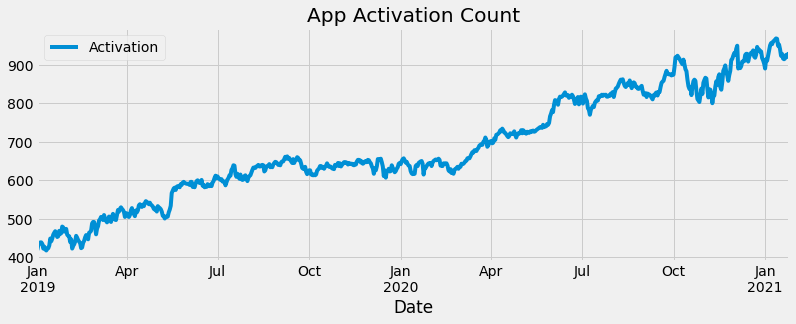

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df_app["Activation"].plot(figsize=(12,4),legend=True)
plt.title('App Activation Count')
plt.show()

In [4]:
df_app.isna().sum()

Activation    0
dtype: int64

In [5]:
(df_app.Activation < 0).values.any()

False

In [6]:
Train = df_app[:'2020-09-30'].iloc[:,0:1].values
Test = df_app['2020-10-01':].iloc[:,0:1].values

In [7]:
Train

array([[419],
       [432],
       [436],
       [439],
       [439],
       [435],
       [423],
       [428],
       [421],
       [418],
       [423],
       [424],
       [431],
       [449],
       [442],
       [449],
       [459],
       [464],
       [468],
       [461],
       [453],
       [455],
       [469],
       [461],
       [463],
       [480],
       [478],
       [467],
       [472],
       [474],
       [459],
       [456],
       [455],
       [440],
       [447],
       [423],
       [430],
       [434],
       [441],
       [456],
       [451],
       [445],
       [441],
       [437],
       [424],
       [426],
       [438],
       [443],
       [452],
       [458],
       [456],
       [447],
       [464],
       [466],
       [469],
       [488],
       [492],
       [492],
       [480],
       [460],
       [475],
       [481],
       [496],
       [499],
       [505],
       [501],
       [497],
       [510],
       [501],
       [495],
       [491],
      

In [8]:
print('Train shape:', Train.shape)
print('Test shape:', Test.shape)

Train shape: (639, 1)
Test shape: (117, 1)


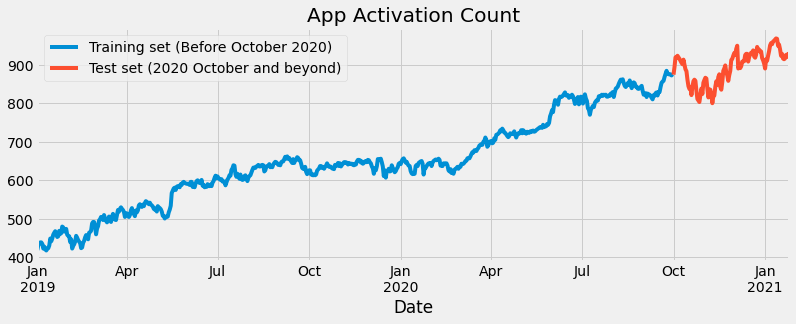

In [9]:
df_app["Activation"][:'2020-09-30'].plot(figsize=(12,4),legend=True)
df_app["Activation"]['2020-10-01':].plot(figsize=(12,4),legend=True)
plt.legend(['Training set (Before October 2020)','Test set (2020 October and beyond)'])
plt.title('App Activation Count')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
Train = Scaler.fit_transform(Train)

In [12]:
X_train = []
y_train = []
for i in range(60,Train.size): 
    X_train.append(Train[i-60:i,0])
    y_train.append(Train[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [20]:
TrainTest = df_app["Activation"][:]
inputs = TrainTest[len(TrainTest)-len(Test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = Scaler.transform(inputs)

X_test = []
y_test = []
for i in range(60,inputs.size): 
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))